In [1]:
import numpy as np
import matplotlib.pyplot as plt

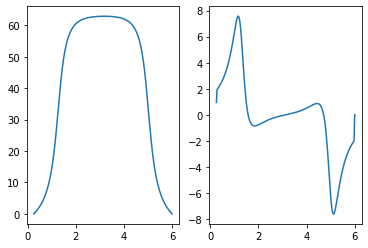

In [24]:
# discretize the state space with a step size h
p,q = 1,1
c1,c2 = 0.5,0.5
eps = 0.25
sig = 0.5

N = 200
h = 2*(np.pi-eps) / N

G = (sig**2) / (c2*h) - c1/c2
X = np.arange(eps, 2*np.pi -eps, h)

V = np.zeros(len(X))
u = np.zeros(len(X))

num_iterations = 100000


for _ in range(num_iterations):
    A = (c2/(4*p*h)*np.cos(X[0])*(V[1] - 0))
    u[0] = np.min([np.max([A, -G]),G])

    A = (c2/(4*p*h)*np.cos(X[-1])*(0 - V[-2]))
    u[-1] = np.min([np.max([A, -G]),G])
    for i in range(1,len(X)-1):
        A = (c2/(4*p*h)*np.cos(X[i])*(V[i+1] - V[i-1]) )
        u[i] = np.min([np.max([A, -G]),G])
        V[i] = 0.5*(V[i+1] + V[i-1]) + ((p*(u[i]**2) * (h**2) + q*(h**2))/ (sig**2)) + (h/(2*sig**2)) *(( c1*np.sin(X[i]) - c2*np.cos(X[i])*u[i])*(V[i+1] - V[i-1]))
        

fig = plt.figure()

ax = fig.add_subplot(1,2,1)
ax.plot(X, V)

ax1 = fig.add_subplot(1,2,2)
ax1.plot(X,u)

plt.show()